Hola Christian!

Soy **Patricio Requena** 👋. Es un placer ser el revisor de tu proyecto el día de hoy!

Revisaré tu proyecto detenidamente con el objetivo de ayudarte a mejorar y perfeccionar tus habilidades. Durante mi revisión, identificaré áreas donde puedas hacer mejoras en tu código, señalando específicamente qué y cómo podrías ajustar para optimizar el rendimiento y la claridad de tu proyecto. Además, es importante para mí destacar los aspectos que has manejado excepcionalmente bien. Reconocer tus fortalezas te ayudará a entender qué técnicas y métodos están funcionando a tu favor y cómo puedes aplicarlos en futuras tareas. 

_**Recuerda que al final de este notebook encontrarás un comentario general de mi parte**_, empecemos!

Encontrarás mis comentarios dentro de cajas verdes, amarillas o rojas, ⚠️ **por favor, no muevas, modifiques o borres mis comentarios** ⚠️:


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class=“tocSkip”></a>
Si todo está perfecto.
</div>

<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class=“tocSkip”></a>
Si tu código está bien pero se puede mejorar o hay algún detalle que le hace falta.
</div>

<div class="alert alert-block alert-danger">
<b>Comentario del revisor</b> <a class=“tocSkip”></a>
Si de pronto hace falta algo o existe algún problema con tu código o conclusiones.
</div>

Puedes responderme de esta forma:
<div class="alert alert-block alert-info">
<b>Respuesta del estudiante</b> <a class=“tocSkip”></a>
</div>

# Descripción del proyecto

En una empresa de videojuegos se trabaja junto con el departamento de Marketing con la finalidad de: 
 - Priorizar hipótesis entre los frameworks "ICE" y "RICE" con la finalidad de obtener la más viable para aplicar y comprobar.
 - Realizar análisis A/B.
     - Hacer graficas y conjeturas sobre los resultados.
     - Analizar los resultados con y sin anomalías para ver los cambios ponderados promedio.
 - Decidir si la prueba continua o es necesario detenerla.

## Importación de librerias y bases de datos

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import ttest_ind
from scipy.stats import mannwhitneyu

In [2]:
hypotheses = pd.read_csv("/datasets/hypotheses_us.csv", sep = ";")
orders = pd.read_csv("/datasets/orders_us.csv")
visits = pd.read_csv("/datasets/visits_us.csv")

display(hypotheses.head(2))
display(hypotheses.tail(2))
display(orders.head(2))
display(orders.tail(2))
display(visits.head(2))
display(visits.tail(2))

,Hypothesis,Reach,Impact,Confidence,Effort
0,Add two new channels for attracting traffic. T...,3,10,8,6
1,Launch your own delivery service. This will sh...,2,5,4,10


,Hypothesis,Reach,Impact,Confidence,Effort
7,Add a subscription form to all the main pages....,10,7,8,5
8,Launch a promotion that gives users discounts ...,1,9,9,5


,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,30.4,B
1,2804400009,3642806036,2019-08-15,15.2,B


,transactionId,visitorId,date,revenue,group
1195,1947021204,1614305549,2019-08-14,5.5,A
1196,3936777065,2108080724,2019-08-15,3120.1,B


,date,group,visits
0,2019-08-01,A,719
1,2019-08-02,A,619


,date,group,visits
60,2019-08-30,B,490
61,2019-08-31,B,718


## Análisis Exploratorio de Datos (AED) y tratamiento de datos

### DataFrame "hypotheses"

In [3]:
print('Forma del DF "hypotheses"')
display(hypotheses.shape)
print('Información general del DF "hypotheses"')
display(hypotheses.info())
print('Descripción del DF "hypotheses"')
display(hypotheses.describe())
print('Filas duplicadas del DF "hypotheses"')
display(hypotheses.duplicated().sum())

Forma del DF "hypotheses"


(9, 5)

Información general del DF "hypotheses"
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Effort      9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


None

Descripción del DF "hypotheses"


,Reach,Impact,Confidence,Effort
count,9.000000,9.000000,9.000000,9.000000
mean,4.777778,4.777778,5.555556,4.888889
std,3.153481,3.192874,3.045944,2.803767
min,1.000000,1.000000,1.000000,1.000000
25%,3.000000,3.000000,3.000000,3.000000
50%,3.000000,3.000000,7.000000,5.000000
75%,8.000000,7.000000,8.000000,6.000000
max,10.000000,10.000000,9.000000,10.000000


Filas duplicadas del DF "hypotheses"


0

#### Conclusiónes del AED "hipotesis"

Las columnas tienen nombres que inician con mayúsculas. Para para facilitar el uso de mi parte los cambiaré a minusculas en pasos futuros. También tenemos un df con 9 filas y 5 columnas sin valores nulos ni filas duplicadas. El Df contiene información sobre hipótesis para aumentar las ventas en las tiendas con distintos parametros para evaluar las opciones.

### DataFrame "orders"

In [4]:
print('Forma del DF "orders"')
display(orders.shape)
print('Información general del DF "orders"')
display(orders.info())
print('Descripción del DF "orders"')
display(orders.describe())
print('Filas duplicadas del DF "orders"')
display(orders.duplicated().sum())

Forma del DF "orders"


(1197, 5)

Información general del DF "orders"
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   transactionId  1197 non-null   int64  
 1   visitorId      1197 non-null   int64  
 2   date           1197 non-null   object 
 3   revenue        1197 non-null   float64
 4   group          1197 non-null   object 
dtypes: float64(1), int64(2), object(2)
memory usage: 46.9+ KB


None

Descripción del DF "orders"


,transactionId,visitorId,revenue
count,1.197000e+03,1.197000e+03,1197.000000
mean,2.155621e+09,2.165960e+09,131.491646
std,1.229085e+09,1.236014e+09,603.004729
min,1.062393e+06,5.114589e+06,5.000000
25%,1.166776e+09,1.111826e+09,20.800000
50%,2.145194e+09,2.217985e+09,50.200000
75%,3.237740e+09,3.177606e+09,130.400000
max,4.293856e+09,4.283872e+09,19920.400000


Filas duplicadas del DF "orders"


0

#### Conclusiónes del AED "orders"

El df cuenta con 1197 filas y 5 columnas sin valores nulos y sin filas duplicadas. Para el mejor manejo los nombres de las columnas serán cambiados a que solo contengan minúsculas y separar palabras con "_".

### DataFrame "visits"

In [5]:
print('Forma del DF "visits"')
display(visits.shape)
print('Información general del DF "visits"')
display(visits.info())
print('Descripción del DF "visits"')
display(visits.describe())
print('Filas duplicadas del DF "visits"')
display(visits.duplicated().sum())

Forma del DF "visits"


(62, 3)

Información general del DF "visits"
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    62 non-null     object
 1   group   62 non-null     object
 2   visits  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


None

Descripción del DF "visits"


,visits
count,62.000000
mean,607.290323
std,114.400560
min,361.000000
25%,534.000000
50%,624.500000
75%,710.500000
max,770.000000


Filas duplicadas del DF "visits"


0

#### Conclusiónes del AED "visits"

El df contiene 62 filas y 3 columnas sin valores nulos ni filas duplicadas. De momento me parece que no es necesario realizar algún cambio en el tratamiento de datos.

*Tareas Chris*
- Modificar el nombre de las columnas del df hypotheses
- Cambiar el nombre de la columna con un guion bajo antes del id

In [6]:
def correct_columns(df):
    df.columns = df.columns.str.lower()
    return df

In [7]:
hypotheses = correct_columns(hypotheses)
orders = orders.rename(columns = {'transactionId': 'transaction_id', 'visitorId': 'visitor_id'})

display(hypotheses.columns)
display(orders.columns)

Index(['hypothesis', 'reach', 'impact', 'confidence', 'effort'], dtype='object')

Index(['transaction_id', 'visitor_id', 'date', 'revenue', 'group'], dtype='object')

### Conclusiones del AED

Contamos con 3 df que tienen información completa sin valores nulos ni filas faltantes a los cuales se les ha hecho un tratamiento unicamente en el nombre de las columnas para hacer más sencillo el manejo para los análisis posteriores.

<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

Buen trabajo con la revisión inicial de tus datos, siempre es importante entender con lo que trabajarás!
</div>

## Priorizar hipótesis

In [8]:
hypotheses.head(2)

,hypothesis,reach,impact,confidence,effort
0,Add two new channels for attracting traffic. T...,3,10,8,6
1,Launch your own delivery service. This will sh...,2,5,4,10


### Framework "ICE"

In [9]:
hypotheses['ice'] = (
    hypotheses['impact']
    * hypotheses['confidence']
) / hypotheses['effort']

display(hypotheses[['hypothesis', 'ice']].sort_values(by = 'ice', ascending = False))

,hypothesis,ice
8,Launch a promotion that gives users discounts ...,16.200000
0,Add two new channels for attracting traffic. T...,13.333333
7,Add a subscription form to all the main pages....,11.200000
6,Show banners with current offers and sales on ...,8.000000
2,Add product recommendation blocks to the store...,7.000000
1,Launch your own delivery service. This will sh...,2.000000
5,Add a customer review page. This will increase...,1.333333
3,Change the category structure. This will incre...,1.125000
4,Change the background color on the main page. ...,1.000000


### Framewwork "RICE"

In [10]:
hypotheses['rice'] = (
    hypotheses['reach']
    * hypotheses['impact']
    * hypotheses['confidence']
) / hypotheses['effort']

display(hypotheses[['hypothesis', 'rice']].sort_values(by = 'rice', ascending = False))

,hypothesis,rice
7,Add a subscription form to all the main pages....,112.0
2,Add product recommendation blocks to the store...,56.0
0,Add two new channels for attracting traffic. T...,40.0
6,Show banners with current offers and sales on ...,40.0
8,Launch a promotion that gives users discounts ...,16.2
3,Change the category structure. This will incre...,9.0
1,Launch your own delivery service. This will sh...,4.0
5,Add a customer review page. This will increase...,4.0
4,Change the background color on the main page. ...,3.0


In [11]:
display(hypotheses.iloc[[0,2,7,8]])

,hypothesis,reach,impact,confidence,effort,ice,rice
0,Add two new channels for attracting traffic. T...,3,10,8,6,13.333333,40.0
2,Add product recommendation blocks to the store...,8,3,7,3,7.000000,56.0
7,Add a subscription form to all the main pages....,10,7,8,5,11.200000,112.0
8,Launch a promotion that gives users discounts ...,1,9,9,5,16.200000,16.2


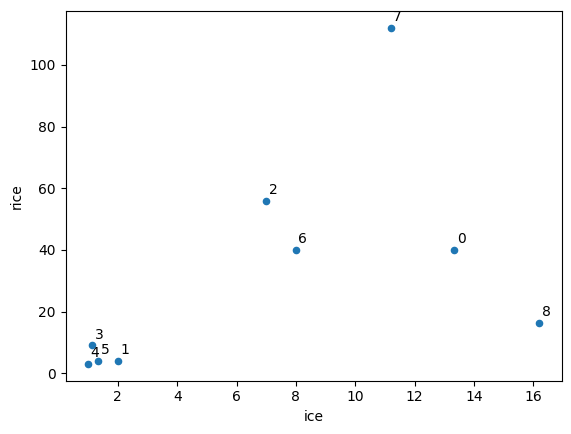

<Figure size 1000x600 with 0 Axes>

In [12]:
ax = hypotheses.plot(
    kind = 'scatter',
    x = 'ice',
    y = 'rice',
)

for i, txt in enumerate(hypotheses.index):
    ax.annotate(txt, (hypotheses['ice'][i], hypotheses['rice'][i]), textcoords="offset points", xytext=(5,5), ha='center')

plt.figure(figsize=(10, 6))
    
plt.show()

### Cambios en la priorización

Las hipótesis en el índice 0 y 8 que parecían importantes para ICE perdieron importancia cuando utilizamos el método RICE, mientras que la hipótesis en el íncice 7 que ya estaba en los primeros 3 lugares toma aún más relevancia. El problema para las primeras dos mencionadas es que tienen muy poco alcance comparado con la del índice 7.

<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

Muy buen trabajo con el cálculo y la explicación de los cambios con la gráfica, siempre es mejor mostrar un gráfico para realizar la comparación y dar mejor entendimiento de tus conclusiones
</div>

### Conclusiones de priorización de hipótesis.

Parece que la mejor opción será usar la hipótesis del índice 7.

## Análisis de test A/B

In [13]:
orders.head(3)

,transaction_id,visitor_id,date,revenue,group
0,3667963787,3312258926,2019-08-15,30.4,B
1,2804400009,3642806036,2019-08-15,15.2,B
2,2961555356,4069496402,2019-08-15,10.2,A


### Graficos de ingresos acumulados.

In [14]:
daily_orders = orders.groupby(['date', 'group'])['revenue'].sum().reset_index()

daily_orders['cumulative_revenue'] = daily_orders.sort_values(by = 'date').groupby('group')['revenue'].cumsum()
display(daily_orders.head(5))


,date,group,revenue,cumulative_revenue
0,2019-08-01,A,2356.8,2356.8
1,2019-08-01,B,1620.0,1620.0
2,2019-08-02,A,1503.5,3860.3
3,2019-08-02,B,2623.8,4243.8
4,2019-08-03,A,1815.2,5675.5


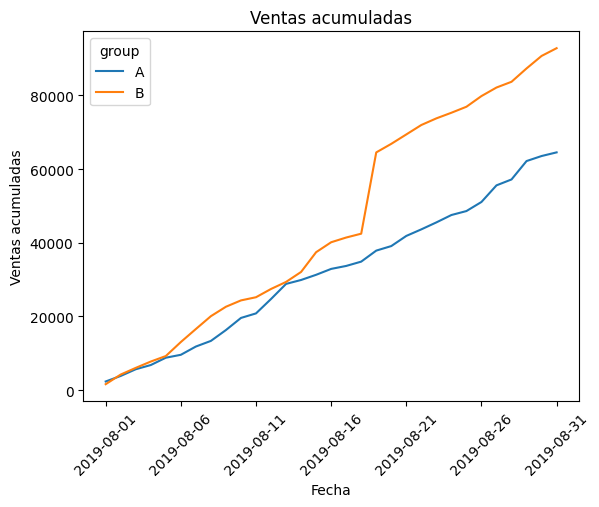

In [15]:
daily_orders.pivot_table(
    index = 'date',
    columns = 'group',
    values = 'cumulative_revenue',
    aggfunc = 'mean'
).plot(
    kind = 'line'
)

plt.title('Ventas acumuladas')
plt.xlabel('Fecha')
plt.ylabel('Ventas acumuladas')
plt.xticks(rotation = 45)

plt.show()

#### Conclusiones Gráficos de ingresos acumulados.

En el gráfico de ingresos acumulados podemos ver que el grupo "B" supera al grupo "A" sin embargo, poco después de la fecha del 16 de agosto hay una subida repentina que podría ser un dato atípico que afecte al resultado final.

<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

Buen trabajo, la visualización deja ver la diferencia claramente
</div>

### Tamaño promedio por grupo acumulado.

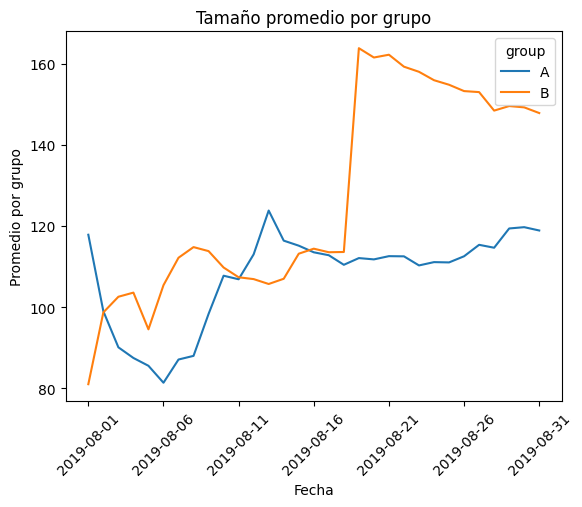

In [16]:
daily_average_orders = (
    orders
    .groupby(['date', 'group'])
    .agg({'visitor_id': 'nunique',
          'revenue': 'sum'                  
    })
    .reset_index()
    .rename(columns = {
        'visitor_id': 'n_buyers'
    })
)

daily_average_orders['cumulative_buyers'] = daily_average_orders.sort_values(by = 'date').groupby('group')['n_buyers'].cumsum()
daily_average_orders['cumulative_revenue'] = daily_average_orders.sort_values(by = 'date').groupby('group')['revenue'].cumsum()

daily_average_orders['average_revenue'] = daily_average_orders['cumulative_revenue'] / daily_average_orders['cumulative_buyers']

daily_average_orders_by_group = (
    daily_average_orders
    .pivot_table(
        index = 'date',
        columns = 'group',
        values = 'average_revenue'
    )
)

daily_average_orders_by_group.plot(kind = 'line')

plt.title('Tamaño promedio por grupo')
plt.xlabel('Fecha')
plt.ylabel('Promedio por grupo')
plt.xticks(rotation = 45)

plt.show()

#### Conclusiones tamaño promedio por grupo acumulado.

Al igual que en el gráfico anterior, poco después del 16 de agosto podemos ver una subida brusca que refuerza la idea de datos atiípicos.

### Diferencia relativa entre el tamaño de pedido promedio acumulado para el grupo B en comparación con el grupo A.

In [17]:
daily_average_orders_by_group.head(2)

group,A,B
date,,
2019-08-01,117.840000,81.000000
2019-08-02,98.982051,98.693023


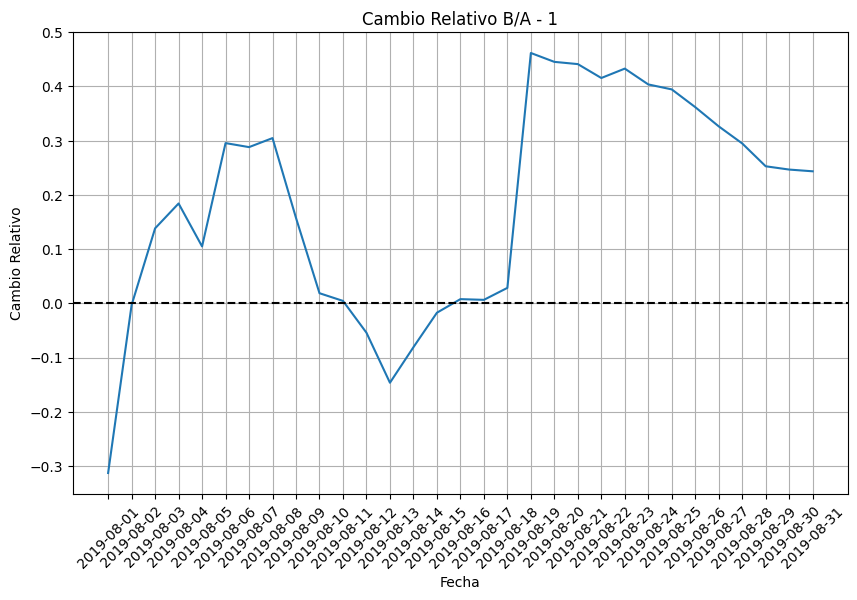

In [18]:
daily_average_orders_by_group['relative_changes'] = (
    daily_average_orders_by_group['B'] / daily_average_orders_by_group['A']
) -1 

plt.figure(figsize=(10, 6))
plt.plot(daily_average_orders_by_group.index, daily_average_orders_by_group['relative_changes'], marker='')
plt.title('Cambio Relativo B/A - 1')
plt.xlabel('Fecha')
plt.ylabel('Cambio Relativo')
plt.grid(True)
plt.axhline(y = 0, color = 'black', linestyle = '--')
plt.xticks(rotation = 45)

plt.show()

#### Conclusiones del tamaño de pedido promedio acumulado para el grupo B en comparación con el grupo A.

En la diferencia relativa podemos ver el mismo valor atípico cerca de la misma fecha que nos confirma que algo paso. Esto podría deberse a una compra o tal vez en este momento el equipo de ventas realizó algo diferente que ayudó a que las ventas aumentaran.

### Tasa de conversión de cada grupo y la relación entre los pedidos y el número de visitas de cada día.

#### Relación pedidos y visitas por día.

In [19]:
orders_visits_merged = orders.merge(
    visits,
    on = ['date', 'group'],
    how = 'inner'
)

orders_visits_merged['d'] = orders_visits_merged['visitor_id']

orders_visits_grouped = (
    orders_visits_merged
    .sort_values(by = 'date')
    .groupby(['date', 'group', 'visits'])
    .agg({'d': 'nunique',
         
         })
    .reset_index()
    .rename(columns = {
        'd': 'n_buyers'
    })
)

orders_visits_grouped['conversion_rate'] = (
    orders_visits_grouped['n_buyers']
    / orders_visits_grouped['visits']
)

orders_visits_grouped['cumulative_buyers'] = (
    orders_visits_grouped
    .sort_values(by = 'date')
    .groupby('group')['n_buyers']
    .cumsum()
)

orders_visits_grouped['cumulative_visits'] = (
    orders_visits_grouped
    .sort_values(by = 'date')
    .groupby('group')['visits']
    .cumsum()
)

orders_visits_grouped['cumulative_conversion'] = (
    orders_visits_grouped['cumulative_buyers']
    / orders_visits_grouped['cumulative_visits']
)

orders_visits_grouped.head(5)

,date,group,visits,n_buyers,conversion_rate,cumulative_buyers,cumulative_visits,cumulative_conversion
0,2019-08-01,A,719,20,0.027816,20,719,0.027816
1,2019-08-01,B,713,20,0.028050,20,713,0.028050
2,2019-08-02,A,619,19,0.030695,39,1338,0.029148
3,2019-08-02,B,581,23,0.039587,43,1294,0.033230
4,2019-08-03,A,507,24,0.047337,63,1845,0.034146


In [20]:
orders_visits_merged

,transaction_id,visitor_id,date,revenue,group,visits,d
0,3667963787,3312258926,2019-08-15,30.4,B,544,3312258926
1,2804400009,3642806036,2019-08-15,15.2,B,544,3642806036
2,3797467345,1196621759,2019-08-15,155.1,B,544,1196621759
3,2282983706,2322279887,2019-08-15,40.5,B,544,2322279887
4,182168103,935554773,2019-08-15,35.0,B,544,935554773
...,...,...,...,...,...,...,...
1192,2274188238,132143192,2019-08-14,15.5,A,735,132143192
1193,1692103379,1022829655,2019-08-14,5.7,A,735,1022829655
1194,2203539145,370388673,2019-08-14,50.1,A,735,370388673
1195,1807773912,573423106,2019-08-14,165.3,A,735,573423106


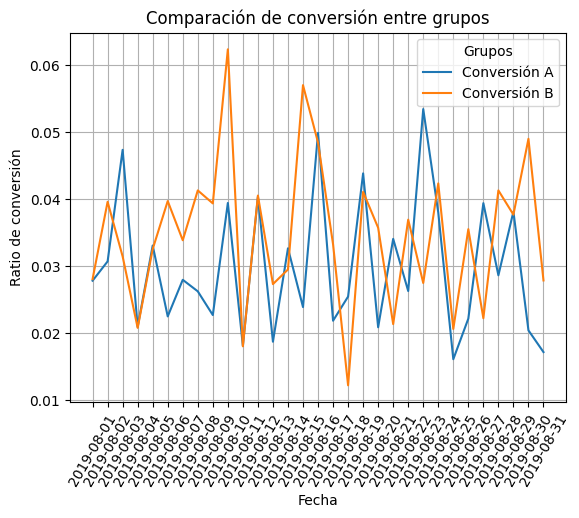

In [21]:
conversion_group_A = orders_visits_grouped[orders_visits_grouped['group'] == 'A']
conversion_group_B = orders_visits_grouped[orders_visits_grouped['group'] == 'B']

plt.plot(conversion_group_A['date'], conversion_group_A['conversion_rate'], label='Conversión A')
plt.plot(conversion_group_B['date'], conversion_group_B['conversion_rate'], label='Conversión B')

plt.title('Comparación de conversión entre grupos')
plt.xlabel('Fecha')
plt.ylabel('Ratio de conversión')
plt.legend(title='Grupos')
plt.grid(True)
plt.xticks(rotation = 60)

plt.show()

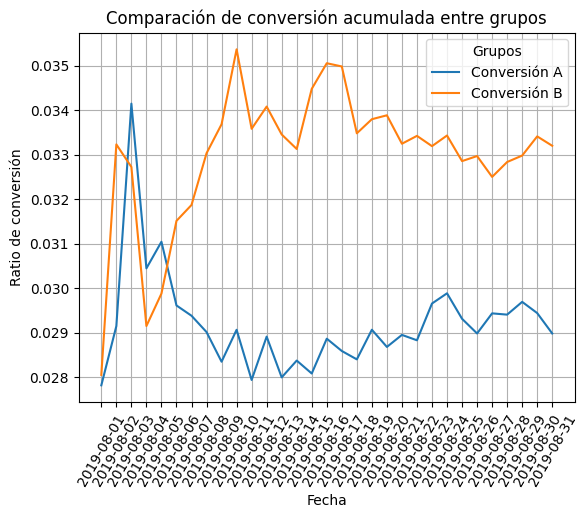

In [22]:
conversion_group_A = orders_visits_grouped[orders_visits_grouped['group'] == 'A']
conversion_group_B = orders_visits_grouped[orders_visits_grouped['group'] == 'B']

plt.plot(conversion_group_A['date'], conversion_group_A['cumulative_conversion'], label='Conversión A')
plt.plot(conversion_group_B['date'], conversion_group_B['cumulative_conversion'], label='Conversión B')

plt.title('Comparación de conversión acumulada entre grupos')
plt.xlabel('Fecha')
plt.ylabel('Ratio de conversión')
plt.legend(title='Grupos')
plt.grid(True)
plt.xticks(rotation = 60)

plt.show()

#### Conversión por grupo.

In [23]:
conversion_by_group = (
    orders_visits_grouped
    .groupby('group')
    .agg({'n_buyers': 'sum',
         'visits': 'sum'})
)
conversion_by_group['conversion_by_group'] = conversion_by_group['n_buyers'] / conversion_by_group['visits']

conversion_by_group

,n_buyers,visits,conversion_by_group
group,,,
A,543,18736,0.028982
B,628,18916,0.033199


#### Conclusión de tasa de conversión por grupo y relación.

En el gráfico de cambios de conversión entre grupos podemos ver líneas que en general van muy similares, enn cuanto al gráfico de conversión acumulada el grupo "B" se mantiene por arriba del "A". Con esta metrica, no parece haber un cambio significativo en la fecha que habíamos visto previamente.

También podemos ver que en el total por grupo la conversión es muy similar, practicamente igual.

### Gráfico de dispersión del número de pedidos por usuario.

<AxesSubplot:xlabel='A', ylabel='B'>

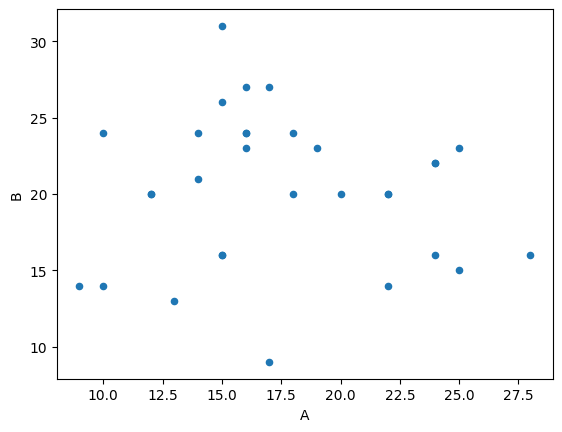

In [24]:
orders_visits_grouped.pivot_table(
    index = 'date',
    columns = 'group',
    values = 'n_buyers'
).plot(kind = 'scatter', x = "A", y = "B")

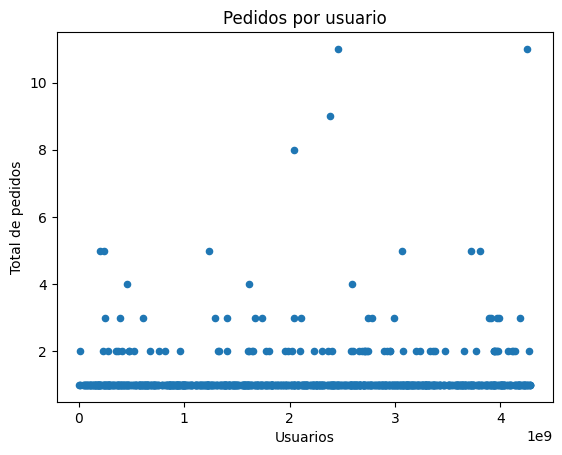

In [25]:
n_orders_by_user = (
    orders
    .groupby('visitor_id')['transaction_id']
    .count()
    .reset_index()
    .rename(columns = {
        'transaction_id': 'total_orders'
    })
)

n_orders_by_user.plot(kind = 'scatter', x = 'visitor_id', y = 'total_orders')

plt.title('Pedidos por usuario')
plt.xlabel('Usuarios')
plt.ylabel('Total de pedidos')

plt.show()

#### Conclusión del número de pedidos por usuario.

Podemos ver que los pedidos por usuario suelen ser de 3 o menos mientras que solo pocos realizan 5 o más.

<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

Excelente trabajo con las visualizaciones y conclusiones desde las mismas, se pueden ver de manera correcta las diferencias entre grupos
</div>

### Percentiles 95 y 99 del número de pedidos por usuario.

In [26]:
print(f'La cantidad de usuarios que se encuentran dentro del 95% en realización de pedidos o menos son: {np.percentile(n_orders_by_user["total_orders"],[95])[0]}')
print(f'La cantidad de usuarios que se encuentran dentro del 99% en realización de pedidos o menos son: {np.percentile(n_orders_by_user["total_orders"],[99])[0]}')


La cantidad de usuarios que se encuentran dentro del 95% en realización de pedidos o menos son: 2.0
La cantidad de usuarios que se encuentran dentro del 99% en realización de pedidos o menos son: 4.0


#### Conclusiones de los percentiles de pedidos por usuario. 

Solo el 1% de los usuarios realizan más de 4 pedidos mientras que el resto realizan 4 o menos pedidos.

### Gráfico de dispersión de precios de los pedidos.

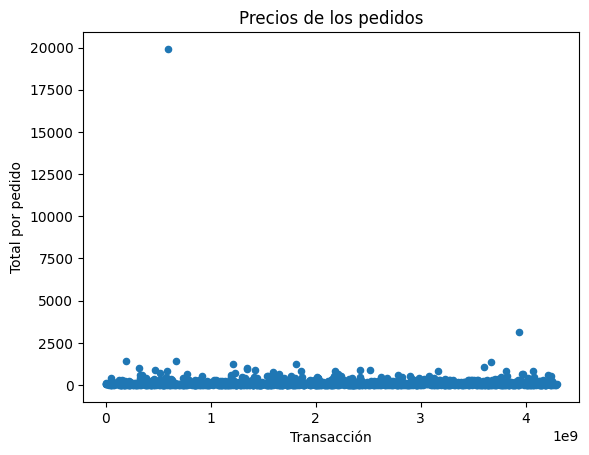

In [27]:
revenue_by_orders = (
    orders
    .groupby(['visitor_id', 'transaction_id'])['revenue']
    .sum()
    .reset_index()
    .rename(columns = {
        'revenue': 'total_per_order'
    })
)

revenue_by_orders.plot(kind = 'scatter', x = 'transaction_id', y = 'total_per_order')

plt.title('Precios de los pedidos')
plt.xlabel('Transacción')
plt.ylabel('Total por pedido')

plt.show()

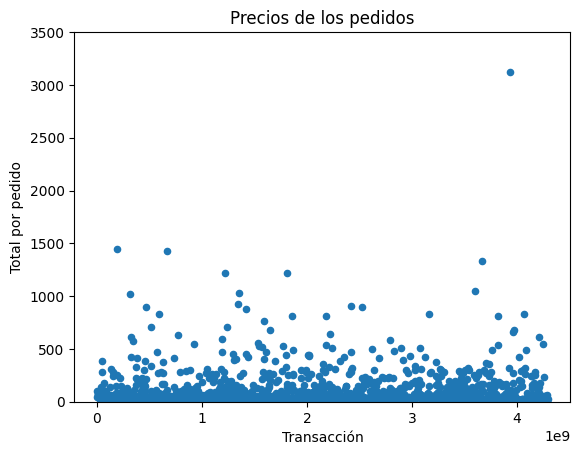

In [28]:
revenue_by_orders.plot(kind = 'scatter', x = 'transaction_id', y = 'total_per_order')

plt.title('Precios de los pedidos')
plt.xlabel('Transacción')
plt.ylabel('Total por pedido')
plt.ylim(0, 3500)

plt.show()

#### Conclusiones de pedidos por usuario.

En una primera vista hay un pedido que va muy por encima del resto. Por esta razon se limitó en una segunda gráfica para obtener una vista sin este valor muy atípico. En la segúnda gráfica encontramos que la grán mayoría de los pedidos se encuentran por debajo del valor de $500.

### Percentiles 95 y 99 de precios de productos.

In [29]:
print(f'El 95% de los pedidos son de: {np.percentile(revenue_by_orders["total_per_order"],[95])[0]} o menos')
print(f'El 99% de los pedidos son de: {np.percentile(revenue_by_orders["total_per_order"],[99])[0]} o menos')

El 95% de los pedidos son de: 435.54 o menos
El 99% de los pedidos son de: 900.9039999999999 o menos


#### Conclusiones de los percentiles de precios de productos.

El 99% de los precios por pedidos se encuentran por debajo del valor de 900 mientras que el 95% están por debajo de 436.

<div class="alert alert-block alert-success">
<b>Comentario general (1ra Iteracion)</b> <a class=“tocSkip”></a>

Buen trabajo revisando los percentiles, encontrar valores anómalos puede ser crucial al momento de mostrar métricas correctas
</div>

### Significancia estadística de conversión entre los grupos con los datos en bruto.

In [30]:
alpha = 0.05

t_stat, p_val = ttest_ind(
    orders_visits_grouped.query('group == "A"')['conversion_rate'],
    orders_visits_grouped.query('group == "B"')['conversion_rate']
)
print(f'El valor p de la tasa de conversión es: {p_val}')

if p_val < alpha:
    print("Hay una diferencia significativa entre los grupos")
else:
    print("No hay una diferencia significativa entre los grupos")

print("""

""")
    
t_stat_cumulative, p_val_cumulative = ttest_ind(
    orders_visits_grouped.query('group == "A"')['cumulative_conversion'],
    orders_visits_grouped.query('group == "B"')['cumulative_conversion']
)
print(f'El valor p de la tasa de conversión acumulada es: {p_val_cumulative}')

if p_val_cumulative < alpha:
    print("Hay una diferencia significativa entre los grupos")
else:
    print("No hay una diferencia significativa entre los grupos")

El valor p de la tasa de conversión es: 0.08641354604901753
No hay una diferencia significativa entre los grupos



El valor p de la tasa de conversión acumulada es: 1.0838035743017294e-15
Hay una diferencia significativa entre los grupos


#### Conclusiones de la significancia estadística con datos en bruto.

Al buscar la significancia estadística en las tasas de conversión pudimos ver que no existe una diverencia en los grupos vistos por día, mientras que en la tasa acumulada sí.

### Significancia estadística del tamaño promedio de pedido de los grupos con los datos en bruto.

In [31]:
orders_visits_revenue_merged = (
    orders_visits_grouped
    .merge(orders[['date','revenue', 'group']],
          on = ['date', 'group'],
          how = 'left'
          )
)

orders_visits_revenue_grouped = (
    orders_visits_revenue_merged
    .groupby(['date', 'group'])['revenue']
    .sum()
    .reset_index()
    .rename(columns = {
        'revenue': 'total_sales_per_day'
    })
)

sales_per_day_A = orders_visits_revenue_grouped[orders_visits_revenue_grouped['group'] == 'A'].mean()
sales_per_day_B = orders_visits_revenue_grouped[orders_visits_revenue_grouped['group'] == 'B'].mean()

ttest_revenue, p_val_revenue = ttest_ind(
    orders_visits_revenue_grouped.query('group == "A"')['total_sales_per_day'],
    orders_visits_revenue_grouped.query('group == "B"')['total_sales_per_day']    
)
print(f'El valor promedio por compras de "" es: {sales_per_day_A}')
print(f'El valor promedio por compras de "" es: {sales_per_day_B}')
print(f'El valor p de la tasa de conversión es: {p_val_revenue}')
print("""
""")
if p_val < alpha:
    print("Hay una diferencia significativa entre los grupos")
else:
    print("No hay una diferencia significativa entre los grupos")

El valor promedio por compras de "" es: total_sales_per_day    2082.416129
dtype: float64
El valor promedio por compras de "" es: total_sales_per_day    2994.858065
dtype: float64
El valor p de la tasa de conversión es: 0.18990653829346774


No hay una diferencia significativa entre los grupos


#### Conclusiones de la significancia estadística del tamaño promedio de los grupos con los datos en bruto.

Se decidió realizar una prueba Wilcoxon-Mann-Whitney ya que notamos que había valores atípicos muy grandes y parecía ser una prueba más adaptada para este contexto. En las pruebas, parece no haber una diferencia sifnificativa.

<div class="alert alert-block alert-success">
<b>Comentario general (1ra Iteracion)</b> <a class=“tocSkip”></a>

Buen trabajo aplicando las pruebas de hipótesis con los datos sin filtrar, veamos como resulta la misma prueba con los datos filtrados
</div>

### Significancia estadística de la diferencia en la conversión entre los grupos utilizando los datos filtrados.

In [32]:
display(n_orders_by_user.head(2))
display(revenue_by_orders.head(2))

,visitor_id,total_orders
0,5114589,1
1,6958315,1


,visitor_id,transaction_id,total_per_order
0,5114589,900025958,10.8
1,6958315,1887336629,25.9


#### Primero realizaré una serie que contenga los datos anormales.

In [33]:
users_with_many_orders = (n_orders_by_user[n_orders_by_user['total_orders'] > 4])
expensive_orders = (revenue_by_orders[revenue_by_orders['total_per_order'] > 900])

abnormal_users = pd.concat([users_with_many_orders, expensive_orders], axis = 0).drop_duplicates().sort_values(by = 'visitor_id').reset_index()

display(abnormal_users.head(3))
print(abnormal_users.shape)

,index,visitor_id,total_orders,transaction_id,total_per_order
0,27,148427295,NaN,316924019.0,1015.9
1,44,199603092,5.0,NaN,NaN
2,55,237748145,5.0,NaN,NaN


(24, 5)


#### Una vez que tengo los visitor_id con los valores atípicos realizaré un filtrado de las bases para dejar fuera aquellos usuarios arriba del 95%

In [34]:
filtered_orders = (
    orders[~orders['visitor_id'].isin(abnormal_users['visitor_id'])]
) 

filtered_merge = (
    filtered_orders
    .merge(
        visits,
        on = ['date', 'group'],
        how = 'left'     
    )   
)

filtered_merge.head(2)

,transaction_id,visitor_id,date,revenue,group,visits
0,3667963787,3312258926,2019-08-15,30.4,B,544
1,2804400009,3642806036,2019-08-15,15.2,B,544


In [35]:
buyers_filtered = (
    filtered_merge
    .sort_values(by = 'date')
    .groupby(['date', 'group', 'visits'])
    .agg({
        'visitor_id': 'nunique'
    })
    .reset_index()
    .rename(columns = {
        'visitor_id': 'n_buyers'
    })
)

buyers_filtered['conversion_rate'] = (
    buyers_filtered['n_buyers']
    / buyers_filtered['visits']
)

buyers_filtered['cumulative_visits'] = (
    buyers_filtered
    .sort_values(by = 'date')
    .groupby('group')['visits']
    .cumsum()
)

buyers_filtered['cumulative_buyers'] = (
    buyers_filtered
    .sort_values(by = 'date')
    .groupby('group')['n_buyers']
    .cumsum()
)

buyers_filtered['cumulative_conversion'] = (
    buyers_filtered['cumulative_buyers']
    / buyers_filtered['cumulative_visits']
)
buyers_filtered.head(5)

,date,group,visits,n_buyers,conversion_rate,cumulative_visits,cumulative_buyers,cumulative_conversion
0,2019-08-01,A,719,19,0.026426,719,19,0.026426
1,2019-08-01,B,713,19,0.026648,713,19,0.026648
2,2019-08-02,A,619,19,0.030695,1338,38,0.028401
3,2019-08-02,B,581,22,0.037866,1294,41,0.031685
4,2019-08-03,A,507,24,0.047337,1845,62,0.033604


#### Continuo a realizar la significancia estadística con la base filtrada.

In [36]:
t_stat_filtered, p_val_filtered = ttest_ind(
    buyers_filtered.query('group == "A"')['cumulative_conversion'],
    buyers_filtered.query('group == "B"')['cumulative_conversion']
)
print(f'El valor p de la tasa de conversión acumulada es: {p_val_filtered}')

if p_val_filtered < alpha:
    print("Hay una diferencia significativa entre los grupos")
else:
    print("No hay una diferencia significativa entre los grupos")

El valor p de la tasa de conversión acumulada es: 2.8766793566654224e-15
Hay una diferencia significativa entre los grupos


#### Conclusiones de la significancia estadística de la diferencia en la conversión entre los grupos utilizando los datos filtrados.

La prueba ttest aplicada a la base con los datos filtrados muestra que sigue existiendo una diferencia significativa entre los dos grupos.

### Significancia estadística de la diferencia en el tamaño promedio de pedido entre los grupos utilizando los datos filtrados.

In [37]:
filtered_merge.head(3)

,transaction_id,visitor_id,date,revenue,group,visits
0,3667963787,3312258926,2019-08-15,30.4,B,544
1,2804400009,3642806036,2019-08-15,15.2,B,544
2,2961555356,4069496402,2019-08-15,10.2,A,628


In [38]:
revenue_filtered = (
    filtered_merge
    .sort_values(by = 'date')
    .groupby(['date', 'group'])['revenue']
    .sum()
    .reset_index()
    .rename(columns = {
        'revenue': 'total_sales_per_day'
    })
)

revenue_filtered_A = revenue_filtered[revenue_filtered['group'] == "A"].mean()
revenue_filtered_B = revenue_filtered[revenue_filtered['group'] == "B"].mean()

ttest_revenue_filtered, p_val_revenue_filtered = ttest_ind(
    revenue_filtered.query("group == 'A'")['total_sales_per_day'],
    revenue_filtered.query("group == 'B'")['total_sales_per_day']
)

print(f'El promedio de ventas del grupo A es: {revenue_filtered_A}')
print(f'El promedio de ventas del grupo B es: {revenue_filtered_B}')
print("""
""")

print(f'El valor p de la tasa de conversión acumulada es: {p_val_revenue_filtered}')
print("""
""")
if p_val_revenue_filtered < alpha:
    print("Hay una diferencia significativa entre los grupos")
else:
    print("No hay una diferencia significativa entre los grupos")

El promedio de ventas del grupo A es: total_sales_per_day    1710.322581
dtype: float64
El promedio de ventas del grupo B es: total_sales_per_day    1964.719355
dtype: float64


El valor p de la tasa de conversión acumulada es: 0.17337316908465497


No hay una diferencia significativa entre los grupos


#### Conclusiones de la significancia estadística de la diferencia en el tamaño promedio de pedido entre los grupos utilizando los datos filtrados.

El ttest indica que sigue sin haber una diferencia significativa en las ventas.

## Gráficas extras.

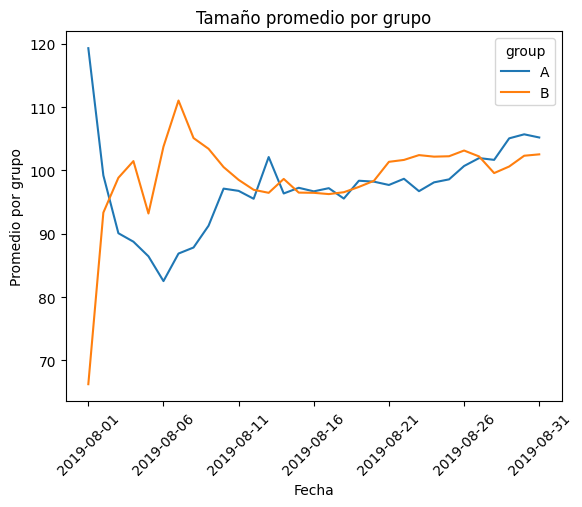

In [39]:
daily_average_orders_filtered = (
    filtered_orders
    .groupby(['date', 'group'])
    .agg({'visitor_id': 'nunique',
          'revenue': 'sum'                  
    })
    .reset_index()
    .rename(columns = {
        'visitor_id': 'n_buyers'
    })
)

daily_average_orders_filtered['cumulative_buyers'] = daily_average_orders_filtered.sort_values(by = 'date').groupby('group')['n_buyers'].cumsum()
daily_average_orders_filtered['cumulative_revenue'] = daily_average_orders_filtered.sort_values(by = 'date').groupby('group')['revenue'].cumsum()

daily_average_orders_filtered['average_revenue'] = daily_average_orders_filtered['cumulative_revenue'] / daily_average_orders_filtered['cumulative_buyers']

daily_average_orders_by_group_filtered = (
    daily_average_orders_filtered
    .pivot_table(
        index = 'date',
        columns = 'group',
        values = 'average_revenue'
    )
)

daily_average_orders_by_group_filtered.plot(kind = 'line')

plt.title('Tamaño promedio por grupo')
plt.xlabel('Fecha')
plt.ylabel('Promedio por grupo')
plt.xticks(rotation = 45)

plt.show()

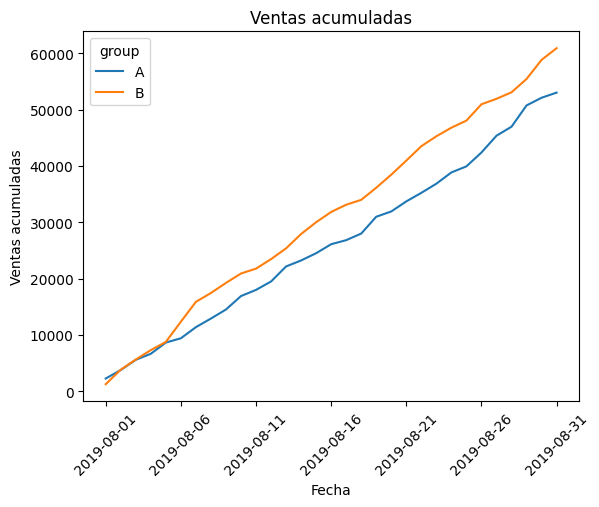

In [40]:
daily_orders_filtered = filtered_merge.groupby(['date', 'group'])['revenue'].sum().reset_index()

daily_orders_filtered['cumulative_revenue'] = daily_orders_filtered.sort_values(by = 'date').groupby('group')['revenue'].cumsum()

daily_orders_filtered.pivot_table(
    index = 'date',
    columns = 'group',
    values = 'cumulative_revenue',
    aggfunc = 'mean'
).plot(
    kind = 'line'
)

plt.title('Ventas acumuladas')
plt.xlabel('Fecha')
plt.ylabel('Ventas acumuladas')
plt.xticks(rotation = 45)

plt.show()

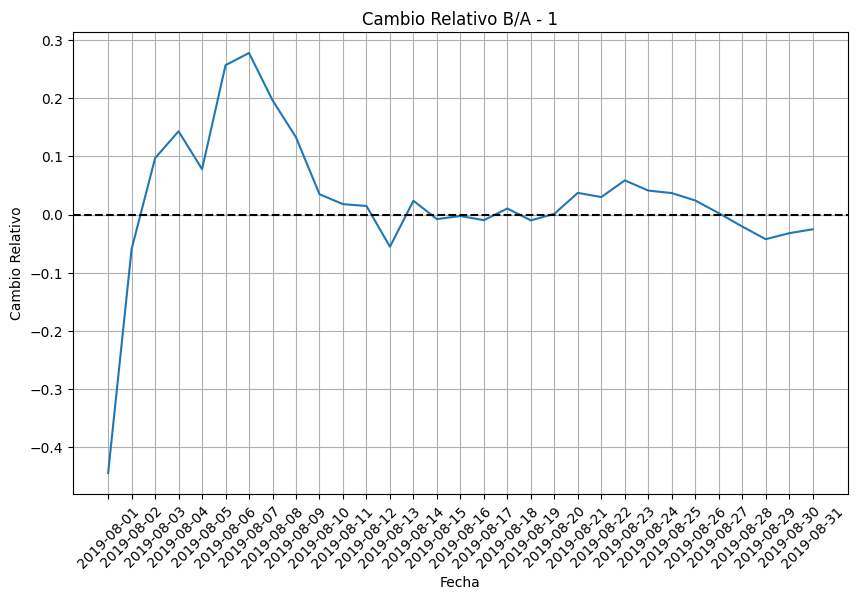

In [41]:
daily_average_orders_by_group_filtered['relative_changes'] = (
    daily_average_orders_by_group_filtered['B'] / daily_average_orders_by_group_filtered['A']
) -1 

plt.figure(figsize=(10, 6))
plt.plot(daily_average_orders_by_group_filtered.index, daily_average_orders_by_group_filtered['relative_changes'], marker='')
plt.title('Cambio Relativo B/A - 1')
plt.xlabel('Fecha')
plt.ylabel('Cambio Relativo')
plt.grid(True)
plt.axhline(y = 0, color = 'black', linestyle = '--')
plt.xticks(rotation = 45)

plt.show()

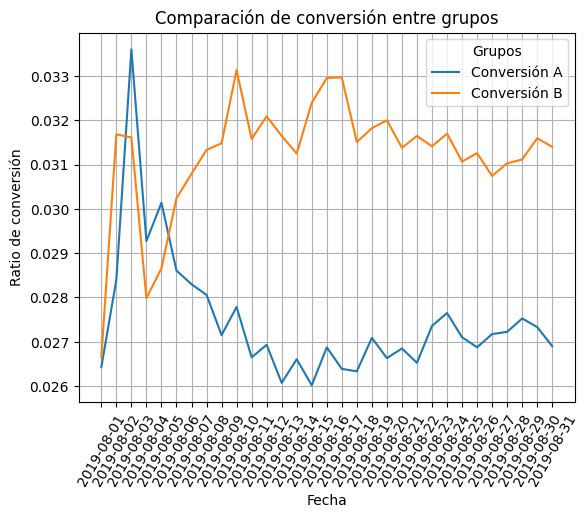

In [42]:
conversion_group_A_filtered_cumulative = buyers_filtered[buyers_filtered['group'] == 'A']
conversion_group_B_filtered_cumulative = buyers_filtered[buyers_filtered['group'] == 'B']

plt.plot(conversion_group_A_filtered_cumulative['date'], conversion_group_A_filtered_cumulative['cumulative_conversion'], label='Conversión A')
plt.plot(conversion_group_B_filtered_cumulative['date'], conversion_group_B_filtered_cumulative['cumulative_conversion'], label='Conversión B')

plt.title('Comparación de conversión entre grupos')
plt.xlabel('Fecha')
plt.ylabel('Ratio de conversión')
plt.legend(title='Grupos')
plt.grid(True)
plt.xticks(rotation = 60)

plt.show()

Si comparamos estos gráficos con los datos filtrados y comparamos con los datos en bruto podemos comprobar que sí hay cambios por los datos atípicos. Se tienen pocos cambios rerpresentativos y la mayoría muestran poca variación entre grupos.

## Conclusión Final

- Los df fueron importados directamente en un formato que ayude a optimizar los datos.
- Durrante la primera parte del análisis solo se necesito modificar los nombres de las columnas para facilitar el análisis posterior.
- Al inicio del análisis y las gráficas comenzamos a ver datos que podían indicar la presencia de datos atípicos. Particularmente en una fecha poco después del 16 de agosto había saltos que llamaban la atención.
- Cuando fue analizada la conversión no se vió graficamente un cambio significante en las fechas posteriores al 16 de agosto.
- La gran mayoría de los usuarios realizan 4 pedidos o menos. Eso quiere decir que los usuarios que se detectaron en los graficos que realizan 5 o más son muy pocos. Pueden considerarse poco convencionales.
- Los precios de los pedidos también tienen datos poco convencionales siendo que el 99% de ellos se encuentra por debajo del valor de $901 mientras que hay hay algunos que sobrebasan por mucho esa cantidad. 
- Una vez eliminados los datos atípicos que están por arriba del 95% de los datos totales, pudimos notar que no existen muchas diferencias en los grupos A y B tanto en las pruebas de significancia, como en los cambios relativos y las graficas de conversión y ventas.
- Tomando esto en cuenta puedo sugerir detener la prueba ya que no parece tener un impacto importante en las tasas de conversión ni las ventas.

<div class="alert alert-block alert-success">
<b>Comentario general (1ra Iteracion)</b> <a class=“tocSkip”></a>

Hiciste un buen trabajo con las visualizaciones, los cálculos y  los ejercicios propuestos los has resuelto muy bien planteando conclusiones claras sobre los resultados obtenidos en cada paso.
    
Planteaste muy buenas conclusiones en el último ejercicio en base a tus datos que es un punto importante que deben tener tus proyectos, como Data Analyst debes buscar apoyar en la toma de decisiones basadas en datos.
    
Te felicito también por que en varias celdas realizaste la buena práctica de dividir la línea de código en varias líneas, esto facilita la lectura del mismo y es una buena práctica en cuanto a programación en Python se refiere.
    
Saludos!
</div>